<a href="https://colab.research.google.com/github/mlacasa/EstadisticaQ2/blob/main/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO 1

## CARGA DE LA BASE DE DATOS



In [1]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.4 MB/s eta 0:00:00


## Generamos los datos de ejemplo

In [4]:
import pandas as pd
import pingouin as pg
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Crear un DataFrame con datos simulados
data = {
    'Tratamiento': ['A'] * 50 + ['B'] * 50 + ['C'] * 50,
    'Resultado': np.concatenate([
        np.random.normal(loc=85, scale=5, size=50),  # Grupo A
        np.random.normal(loc=78, scale=5, size=50),  # Grupo B
        np.random.normal(loc=90, scale=5, size=50)   # Grupo C
    ])
}

df = pd.DataFrame(data)
df.head()

,Tratamiento,Resultado
0,A,86.417015
1,A,89.820349
2,A,83.261668
3,A,84.497445
4,A,86.876039


## Comentar la estructura de la base de datos.

In [14]:
conteo_por_grupo = df.groupby('Tratamiento').size()
print("Conteo por grupo:\n", conteo_por_grupo)

Conteo por grupo:
 Tratamiento
A    50
B    50
C    50
dtype: int64


In [11]:
# Estadísticas descriptivas con statsmodels
summary = sm.datasets.get_rdataset("mtcars").data.describe()
summary



,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## Comenta la siguiente gráfica

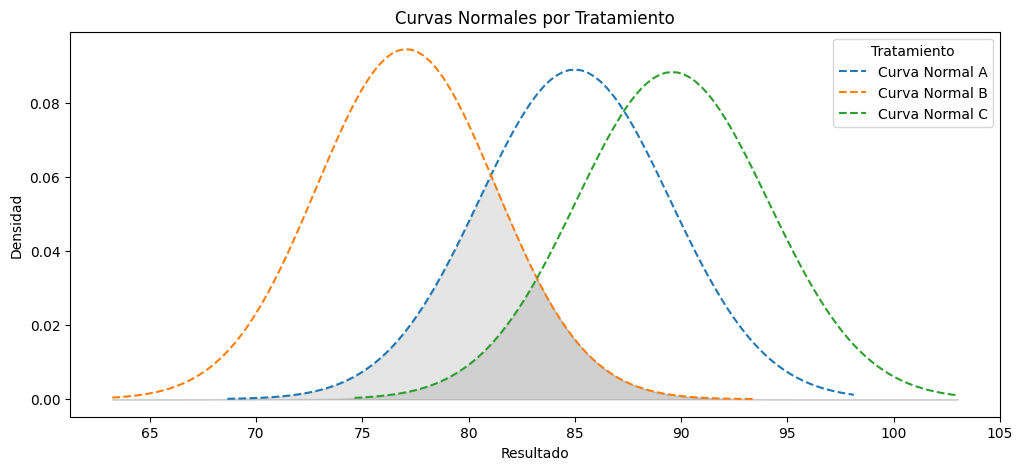

In [13]:
plt.figure(figsize=(12, 5))

# Para almacenar los valores de las curvas
curvas = {}

# Para cada tratamiento, calcular y dibujar la curva normal
for tratamiento in df['Tratamiento'].unique():
    subset = df[df['Tratamiento'] == tratamiento]
    # Calcular parámetros de la distribución normal
    mean = subset['Resultado'].mean()
    std = subset['Resultado'].std()

    # Crear un rango para la curva
    x = np.linspace(subset['Resultado'].min() - 5, subset['Resultado'].max() + 5, 100)
    y = stats.norm.pdf(x, mean, std)

    # Almacenar la curva para la superposición
    curvas[tratamiento] = (x, y)

    # Dibujar la curva normal
    plt.plot(x, y, label=f'Curva Normal {tratamiento}', linestyle='--')

# Colorear las zonas solapadas
x_range = np.linspace(df['Resultado'].min() - 5, df['Resultado'].max() + 5, 1000)
y_values = [stats.norm.pdf(x_range, df[df['Tratamiento'] == t]['Resultado'].mean(), df[df['Tratamiento'] == t]['Resultado'].std()) for t in df['Tratamiento'].unique()]

for i in range(len(y_values) - 1):
    # Obtener los máximos para encontrar la región superpuesta
    overlapping_region = np.minimum(y_values[i], y_values[i + 1])

    plt.fill_between(x_range, overlapping_region, alpha=0.2, color='grey')

plt.title('Curvas Normales por Tratamiento')
plt.xlabel('Resultado')
plt.ylabel('Densidad')
plt.legend(title='Tratamiento')
plt.show()

## Analizamos los datos

## Nos ayudamos de los gráficos BoxPlot

### Comenta este gráfico

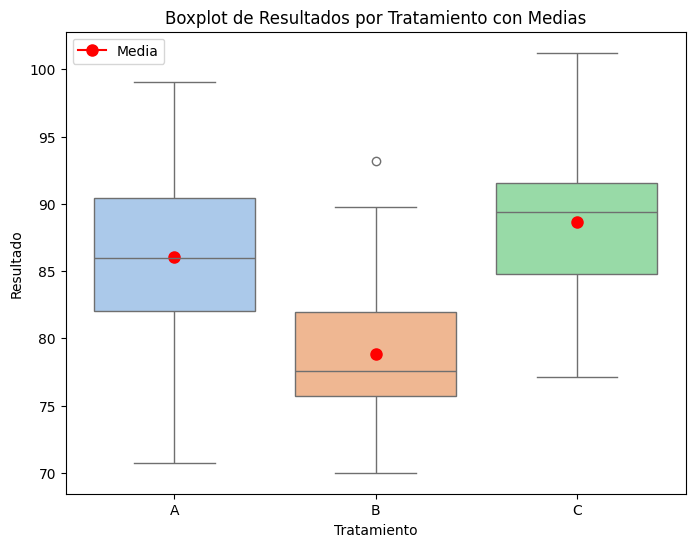

In [ ]:
# Paso 3: Gráfico boxplot mejorado
plt.figure(figsize=(8, 6))

# Crear el boxplot con un paleta de colores personalizada
sns.boxplot(x = 'Tratamiento', hue='Tratamiento', y='Resultado', data=df, palette='pastel')

# Calcular y agregar la media para cada grupo
means = df.groupby('Tratamiento')['Resultado'].mean().values
for i, mean in enumerate(means):
    plt.plot(i, mean, marker='o', color='red', markersize=8, label='Media' if i == 0 else "")

# Configurar aspectos del gráfico
plt.title('Boxplot de Resultados por Tratamiento con Medias')
plt.xlabel('Tratamiento')
plt.ylabel('Resultado')

# Añadir leyenda
plt.legend()
plt.show()



## TEST DE NORMALIDAD

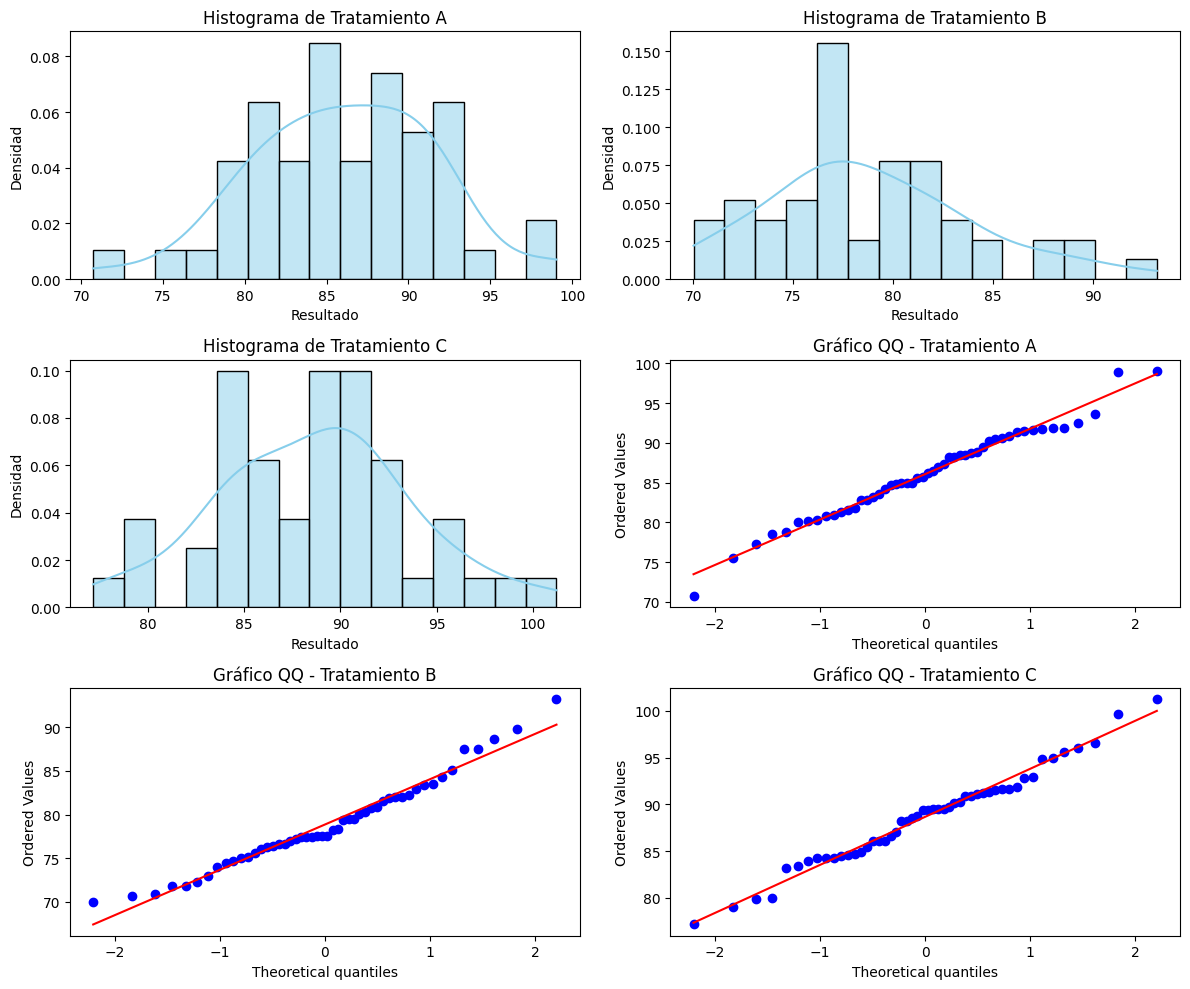

In [ ]:
# Paso 4: Pruebas de Normalidad y Gráficos QQ
plt.figure(figsize=(12, 10))
for i, tratamiento in enumerate(df['Tratamiento'].unique(), start=1):
    # Histograma
    plt.subplot(3, 2, i)
    sns.histplot(df[df['Tratamiento'] == tratamiento]['Resultado'], bins=15, kde=True, stat='density', color='skyblue')
    plt.title(f'Histograma de Tratamiento {tratamiento}')
    plt.xlabel('Resultado')
    plt.ylabel('Densidad')

    # Gráfico QQ
    plt.subplot(3, 2, i + 3)
    stats.probplot(df[df['Tratamiento'] == tratamiento]['Resultado'], dist="norm", plot=plt)
    plt.title(f'Gráfico QQ - Tratamiento {tratamiento}')

plt.tight_layout()
plt.show()

## Comentar los resultados

In [15]:
# Paso 5: Realizar Pruebas de Normalidad (Shapiro-Wilk)
normality_results = pg.normality(df, dv='Resultado', group='Tratamiento')
print("Resultados de la Prueba de Normalidad")
print(normality_results)

Resultados de la Prueba de Normalidad
                    W      pval  normal
Tratamiento                            
A            0.956202  0.061654    True
B            0.983403  0.701375    True
C            0.985977  0.812658    True


## ANÁLISIS DE LA HOMOCEDASTICIDAD DE LAS MUESTRAS

In [ ]:
# Paso 6: Prueba de Homocedasticidad (Levene)
homoscedasticity = pg.homoscedasticity(df, dv='Resultado', group='Tratamiento')
print("\nResultados de la Prueba de Homocedasticidad")
print(homoscedasticity)


Resultados de la Prueba de Homocedasticidad
               W      pval  equal_var
levene  0.427382  0.653022       True


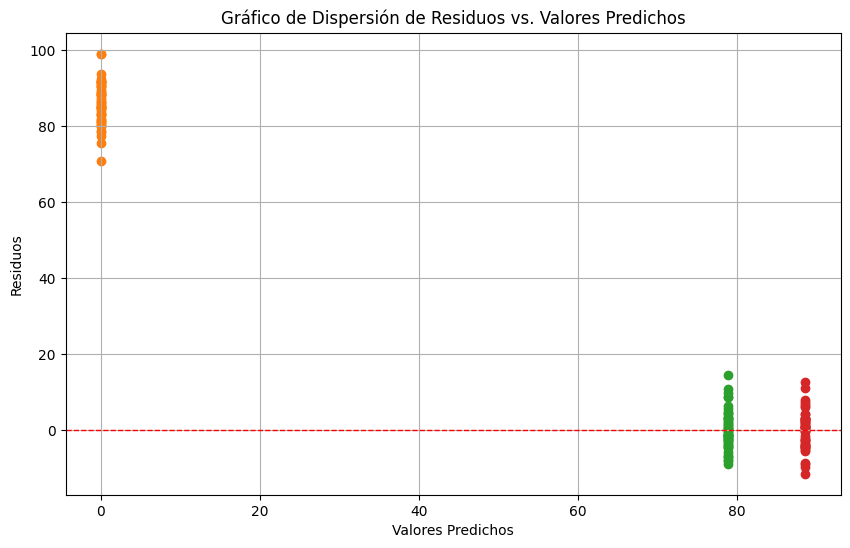

In [ ]:
import statsmodels.api as sm
# Paso 1: Realizar el ANOVA
anova_results = pg.anova(dv='Resultado', between='Tratamiento', data=df, detailed=True)

# Paso 2: Ajustar un modelo lineal para obtener los residuos
model = sm.OLS(df['Resultado'], pd.get_dummies(df['Tratamiento'], drop_first=True)).fit()

# Paso 3: Obtener los residuos y los valores predichos
residuals = model.resid
fitted = model.fittedvalues

# Paso 4: Gráfico de dispersión para evaluar la homocedasticidad
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Línea en y=0
plt.title('Gráfico de Dispersión de Residuos vs. Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid()

# Añadir etiquetas de grupo
for i, tratamiento in enumerate(df['Tratamiento'].unique()):
    plt.scatter(fitted[df['Tratamiento'] == tratamiento], residuals[df['Tratamiento'] == tratamiento], label=tratamiento)

## SE CUMPLE CRITERIOS ANOVA ONE WAY



In [17]:
# Paso 7: Realizar el ANOVA
anova_results = pg.anova(dv='Resultado', between='Tratamiento', data=df, detailed=True)
print("\nResultados del ANOVA")
print(anova_results)

# Paso 8: Interpretar los Resultados
if anova_results['p-unc'][0] < 0.05:
    print("Hay diferencias significativas entre los tratamientos.")
else:
    print("No hay diferencias significativas entre los tratamientos.")


Resultados del ANOVA
        Source           SS   DF           MS           F         p-unc  \
0  Tratamiento  4008.585740    2  2004.292870  103.354407  9.383216e-29   
1       Within  2850.686867  147    19.392428         NaN           NaN   

        np2  
0  0.584404  
1       NaN  
Hay diferencias significativas entre los tratamientos.


## Interpretación de la Salida del ANOVA


In [18]:
# Paso 9: Pruebas Ad Hoc (si es necesario)
if anova_results['p-unc'][0] < 0.05:
    post_hoc = pg.pairwise_tukey(data=df, dv='Resultado', between='Tratamiento')
    print("\nResultados Post Hoc de Tukey")
post_hoc


Resultados Post Hoc de Tukey


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,84.990484,77.065348,7.925136,0.880737,8.998303,2.464695e-14,1.808338
1,A,C,84.990484,89.580795,-4.590311,0.880737,-5.211900,1.857229e-06,-1.013521
2,B,C,77.065348,89.580795,-12.515447,0.880737,-14.210203,2.153833e-14,-2.844338


## ANÁLISIS CON BONFERRONI

In [19]:
# Paso 5: Verificar si hay diferencias significativas
if anova_results['p-unc'][0] < 0.05:
    print("ANOVA significativo, se procede al análisis post-hoc.")

    # Paso 6: Realizar análisis post-hoc utilizando Bonferroni
    post_hoc_results = pg.pairwise_tests(dv='Resultado', between='Tratamiento', data=df, padjust='bonf')

    # Paso 7: Mostrar resultados de Bonferroni
    print("Resultados del Análisis Post-Hoc con Bonferroni:")
    print(post_hoc_results)
else:
    print("No se encontraron diferencias significativas en el ANOVA.")

ANOVA significativo, se procede al análisis post-hoc.
Resultados del Análisis Post-Hoc con Bonferroni:
      Contrast  A  B  Paired  Parametric          T   dof alternative  \
0  Tratamiento  A  B   False        True   9.111597  98.0   two-sided   
1  Tratamiento  A  C   False        True  -5.106785  98.0   two-sided   
2  Tratamiento  B  C   False        True -14.331653  98.0   two-sided   

          p-unc        p-corr p-adjust       BF10    hedges  
0  1.025267e-14  3.075802e-14     bonf   4.75e+11  1.808338  
1  1.613251e-06  4.839752e-06     bonf   9038.001 -1.013521  
2  8.698726e-26  2.609618e-25     bonf  2.602e+22 -2.844338  


# ANOVA de Datos Pareados




In [20]:
# Definir número de pacientes por grupo
num_pacientes_por_grupo = 50
grupos = ['A', 'B', 'C']

# Crear el DataFrame simulado
data = {
    'Edad': np.random.randint(30, 70, size=num_pacientes_por_grupo * len(grupos)),  # Edades entre 30 y 70
    'Sexo': np.random.choice(['Masculino', 'Femenino'], size=num_pacientes_por_grupo * len(grupos)),  # Sexo
    'Tratamiento': np.repeat(grupos, num_pacientes_por_grupo),  # Tratamiento A, B y C
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Simular los niveles de colesterol inicial y final para cada tratamiento
# Supongamos que los niveles de colesterol son distintos según el tratamiento
df['Colesterol_Inicial'] = np.concatenate([
    np.random.normal(loc=220, scale=15, size=num_pacientes_por_grupo),  # Tratamiento A
    np.random.normal(loc=230, scale=15, size=num_pacientes_por_grupo),  # Tratamiento B
    np.random.normal(loc=215, scale=15, size=num_pacientes_por_grupo)   # Tratamiento C
])

# Simular una reducción en colesterol después de 8 semanas de tratamiento
# Supongamos que el efecto del tratamiento varía
df['Colesterol_Final'] = df['Colesterol_Inicial'] - np.concatenate([
    np.random.randint(15, 30, size=num_pacientes_por_grupo),  # Tratamiento A
    np.random.randint(10, 25, size=num_pacientes_por_grupo),  # Tratamiento B
    np.random.randint(20, 35, size=num_pacientes_por_grupo)   # Tratamiento C
])
df.head()

,Edad,Sexo,Tratamiento,Colesterol_Inicial,Colesterol_Final
0,65,Femenino,A,219.285801,203.285801
1,48,Femenino,A,225.759389,200.759389
2,66,Femenino,A,214.157035,189.157035
3,34,Femenino,A,246.263023,218.263023
4,38,Femenino,A,227.196280,207.196280


## Analizamos si existen diferencias significativas

In [21]:
from scipy.stats import chi2_contingency
# Paso 3: Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(df['Tratamiento'], df['Sexo'], margins=True)

print("Tabla de Contingencia:")
print(tabla_contingencia)

# Paso 4: Realizar la prueba chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia.iloc[:-1, :-1])  # Excluir la fila y columna de totales

# Paso 5: Mostrar resultados
print(f"\nResultado de la Prueba Chi-Cuadrado:")
print(f"Chi-cuadrado: {chi2:.4f}, p-valor: {p:.4f}, grados de libertad: {dof}")
print("Frecuencias Esperadas:")
print(expected)


Tabla de Contingencia:
Sexo         Femenino  Masculino  All
Tratamiento                          
A                  27         23   50
B                  21         29   50
C                  24         26   50
All                72         78  150

Resultado de la Prueba Chi-Cuadrado:
Chi-cuadrado: 1.4423, p-valor: 0.4862, grados de libertad: 2
Frecuencias Esperadas:
[[24. 26.]
 [24. 26.]
 [24. 26.]]


In [22]:

# Paso 6: Interpretar resultados
alpha = 0.05
if p < alpha:
    print("Hay diferencias significativas entre los grupos y el sexo (rechazamos H0).")
else:
    print("No hay diferencias significativas entre los grupos y el sexo (no rechazamos H0).")

No hay diferencias significativas entre los grupos y el sexo (no rechazamos H0).


## UN ANÁLISIS VISUAL

Se genera un gráfico para evaluar si hubieran diferencias entre los resultados del tratamiento según sexo, y se observa que pudiera haberlos en el grupo C.

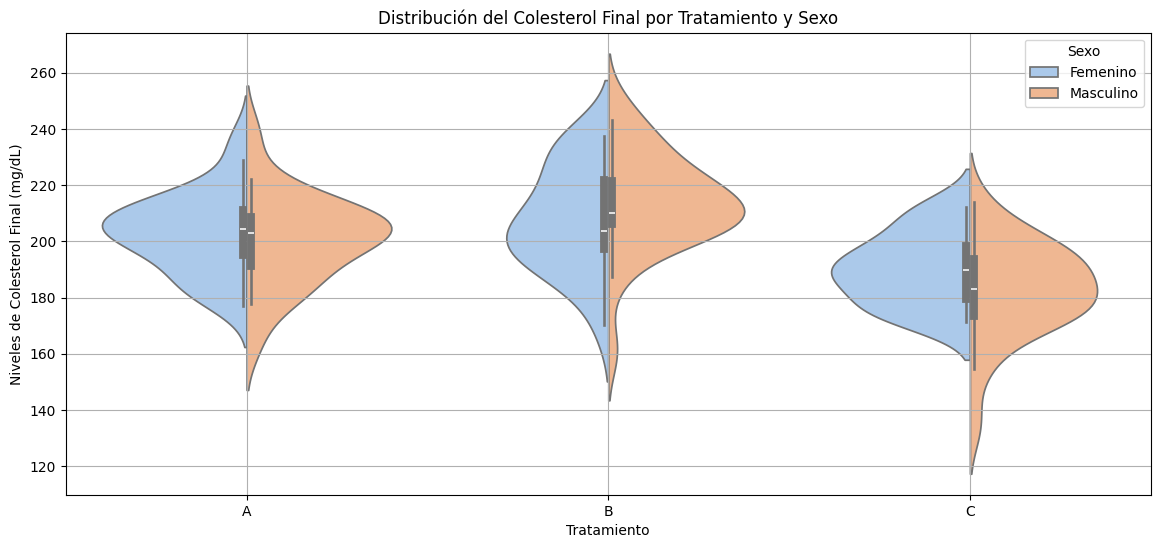

In [23]:
#Gráfico de violín para visualizar la distribución de colesterol por sexo y grupo
plt.figure(figsize=(14, 6))
sns.violinplot(x='Tratamiento', y='Colesterol_Final', hue='Sexo', data=df, split=True, palette='pastel')
plt.title('Distribución del Colesterol Final por Tratamiento y Sexo')
plt.xlabel('Tratamiento')
plt.ylabel('Niveles de Colesterol Final (mg/dL)')
plt.legend(title='Sexo')
plt.grid(True)
plt.show()

# ANOVA EVALUAR SI LA EDAD TIENE DIFERENCIAS ENTRE GRUPOS

Resultados del ANOVA de Edad por Grupos de Tratamiento:
        Source  ddof1  ddof2         F     p-unc       np2
0  Tratamiento      2    147  4.558488  0.012002  0.058398
Hay diferencias significativas en la edad entre los grupos de tratamiento (rechazamos H0).


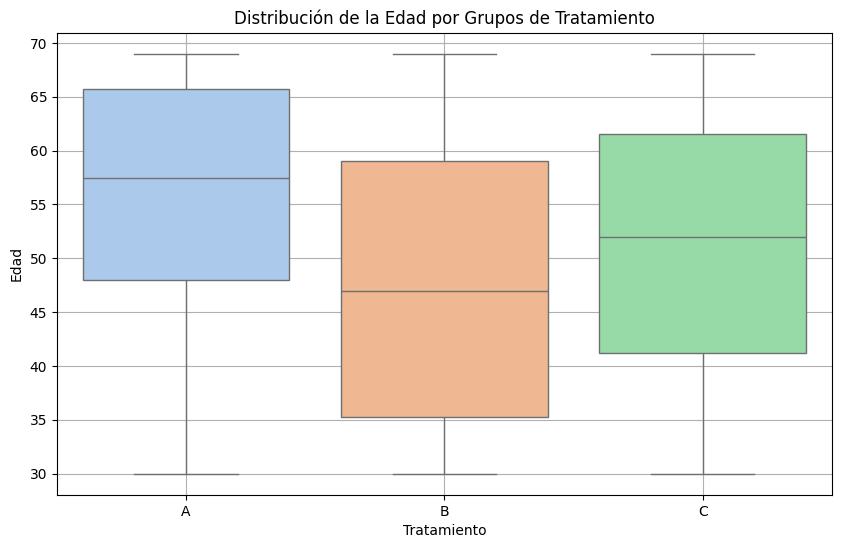

In [24]:
# Paso 3: Realizar el ANOVA para evaluar diferencias en la edad entre grupos de tratamiento
anova_results = pg.anova(dv='Edad', between='Tratamiento', data=df)

# Paso 4: Mostrar resultados del ANOVA
print("Resultados del ANOVA de Edad por Grupos de Tratamiento:")
print(anova_results)

# Paso 5: Interpretar resultados
alpha = 0.05
if anova_results['p-unc'][0] < alpha:
    print("Hay diferencias significativas en la edad entre los grupos de tratamiento (rechazamos H0).")
else:
    print("No hay diferencias significativas en la edad entre los grupos de tratamiento (no rechazamos H0).")

# Paso 6: Visualización
plt.figure(figsize=(10, 6))
sns.boxplot(hue='Tratamiento',  x='Tratamiento', y='Edad', data=df, palette='pastel')
plt.title('Distribución de la Edad por Grupos de Tratamiento')
plt.xlabel('Tratamiento')
plt.ylabel('Edad')
plt.grid()
plt.show()

## Y los niveles de colesterior inicial por grupos, hay diferencias significativas?

Resultados del ANOVA de un Solo Factor en Colesterol Inicial:
        Source  ddof1  ddof2         F     p-unc       np2
0  Tratamiento      2    147  13.72722  0.000003  0.157373
Hay diferencias significativas en el colesterol inicial entre los grupos de tratamiento (rechazamos H0).


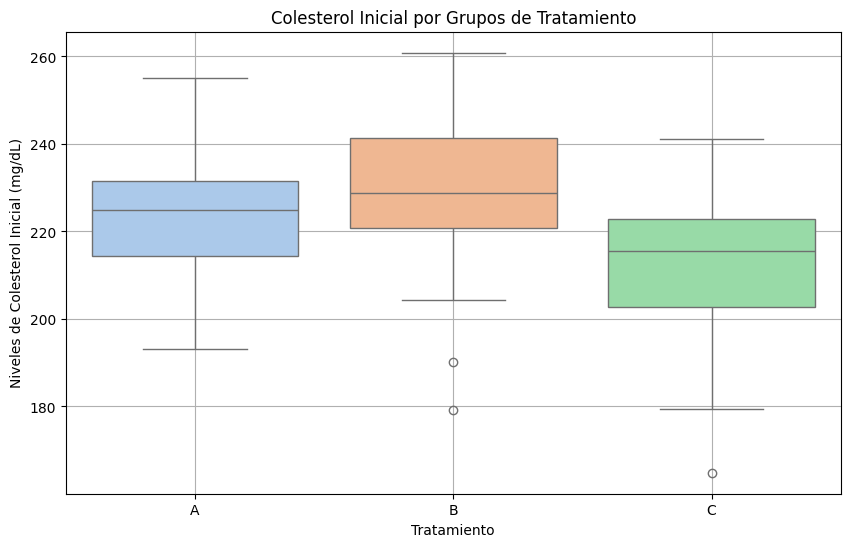

In [25]:
# Paso 3: Realizar el ANOVA de un solo factor para el colesterol inicial
anova_results = pg.anova(dv='Colesterol_Inicial', between='Tratamiento', data=df)

# Paso 4: Mostrar resultados del ANOVA
print("Resultados del ANOVA de un Solo Factor en Colesterol Inicial:")
print(anova_results)

# Paso 5: Interpretar resultados
alpha = 0.05
if anova_results['p-unc'][0] < alpha:
    print("Hay diferencias significativas en el colesterol inicial entre los grupos de tratamiento (rechazamos H0).")
else:
    print("No hay diferencias significativas en el colesterol inicial entre los grupos de tratamiento (no rechazamos H0).")

# Paso 6: Visualización de los resultados
plt.figure(figsize=(10, 6))
sns.boxplot(hue='Tratamiento', x='Tratamiento', y='Colesterol_Inicial', data=df, palette='pastel')
plt.title('Colesterol Inicial por Grupos de Tratamiento')
plt.xlabel('Tratamiento')
plt.ylabel('Niveles de Colesterol Inicial (mg/dL)')
plt.grid()
plt.show()

## HEMOS DE DETALLAR ESTA DIFERENCIA

Existe el grupo B que tiene un colesterol incial significativamente más alto qeu el resto, y debe tenerse en cuenta en el posterior análisis.

## ANOVA DE DATOS PAREADOS

Ahora analizamos si hay diferencias significativas entre los niveles iniciales y finales

Resultados del ANOVA de Datos Pareados en Colesterol:
     Source  ddof1  ddof2          F     p-unc       ng2  eps
0  Medición      1      2  64.134753  0.015237  0.618795  1.0
Hay diferencias significativas en el colesterol entre los grupos de tratamiento (rechazamos H0).


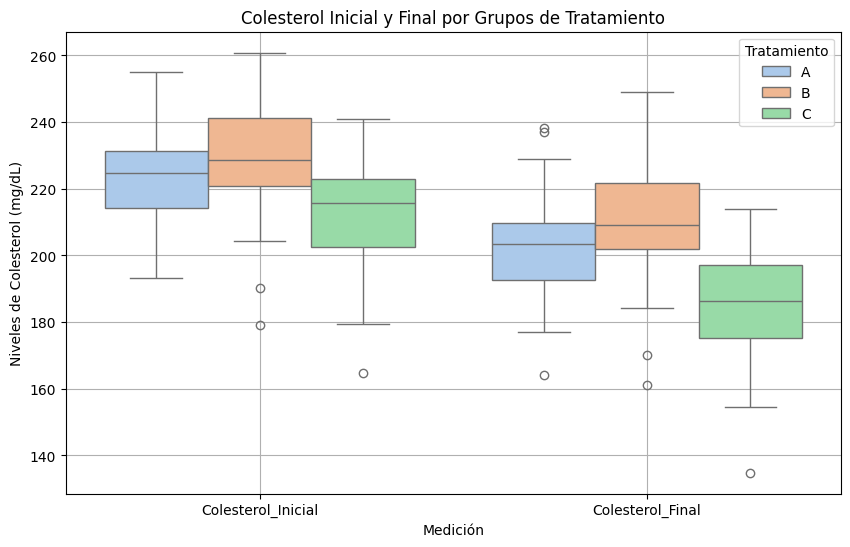

In [26]:
df_melted = df.melt(id_vars='Tratamiento', value_vars=['Colesterol_Inicial', 'Colesterol_Final'],
                    var_name='Medición', value_name='Colesterol')
# Realizar el ANOVA de medidas repetidas
anova_results = pg.rm_anova(dv='Colesterol', within='Medición', subject='Tratamiento', data=df_melted)

# Paso 4: Mostrar resultados del ANOVA
print("Resultados del ANOVA de Datos Pareados en Colesterol:")
print(anova_results)

# Paso 5: Interpretar resultados
alpha = 0.05
if anova_results['p-unc'][0] < alpha:
    print("Hay diferencias significativas en el colesterol entre los grupos de tratamiento (rechazamos H0).")
else:
    print("No hay diferencias significativas en el colesterol entre los grupos de tratamiento (no rechazamos H0).")

# Paso 6: Visualización de los resultados
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medición', y='Colesterol', hue='Tratamiento', data=df_melted, palette='pastel')
plt.title('Colesterol Inicial y Final por Grupos de Tratamiento')
plt.xlabel('Medición')
plt.ylabel('Niveles de Colesterol (mg/dL)')
plt.legend(title='Tratamiento')
plt.grid()
plt.show()

## ANOVA ONE WAY NIVEL COLESTEROL FINAL



Resultados del ANOVA de un Solo Factor en Colesterol Final:
        Source  ddof1  ddof2          F         p-unc       np2
0  Tratamiento      2    147  31.092992  5.478724e-12  0.297276
Hay diferencias significativas en el colesterol final entre los grupos de tratamiento (rechazamos H0).

Resultados de la Prueba Post-Hoc Bonferroni:
      Contrast  A  B  Paired  Parametric         T   dof alternative  \
0  Tratamiento  A  B   False        True -2.837532  98.0   two-sided   
1  Tratamiento  A  C   False        True  5.220933  98.0   two-sided   
2  Tratamiento  B  C   False        True  7.537195  98.0   two-sided   

          p-unc        p-corr p-adjust       BF10    hedges  
0  5.525802e-03  1.657741e-02     bonf      6.961 -0.563152  
1  9.989123e-07  2.996737e-06     bonf  1.401e+04  1.036175  
2  2.430694e-11  7.292083e-11     bonf  2.856e+08  1.495873  


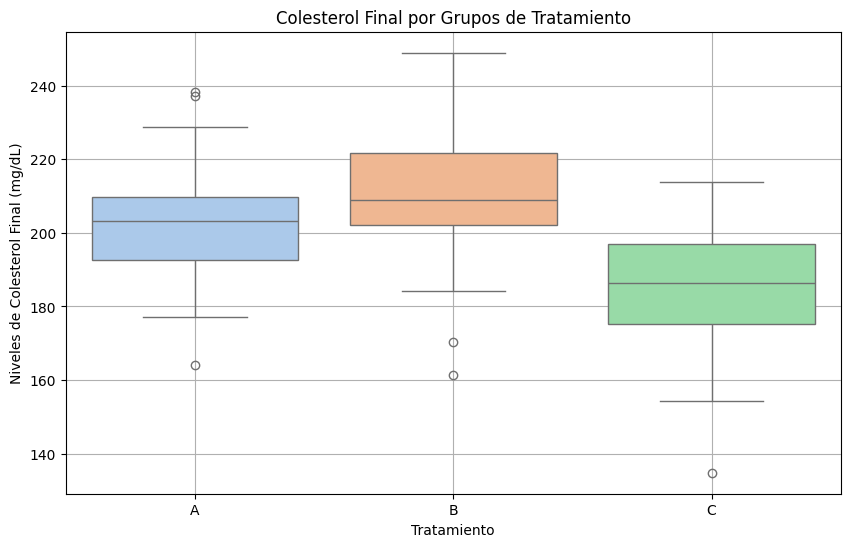

In [27]:
# Paso 3: Realizar el ANOVA de un solo factor para el colesterol final
anova_results = pg.anova(dv='Colesterol_Final', between='Tratamiento', data=df)

# Paso 4: Mostrar resultados del ANOVA
print("Resultados del ANOVA de un Solo Factor en Colesterol Final:")
print(anova_results)

# Paso 5: Interpretar resultados
alpha = 0.05
if anova_results['p-unc'][0] < alpha:
    print("Hay diferencias significativas en el colesterol final entre los grupos de tratamiento (rechazamos H0).")
else:
    print("No hay diferencias significativas en el colesterol final entre los grupos de tratamiento (no rechazamos H0).")

# Paso 6: Realizar la prueba post-hoc de Bonferroni
if anova_results['p-unc'][0] < alpha:
    post_hoc_results = pg.pairwise_tests(dv='Colesterol_Final', between='Tratamiento', data=df, padjust='bonf')
    print("\nResultados de la Prueba Post-Hoc Bonferroni:")
    print(post_hoc_results)

# Paso 7: Visualización de los resultados
plt.figure(figsize=(10, 6))
sns.boxplot(hue='Tratamiento', x='Tratamiento', y='Colesterol_Final', data=df, palette='pastel')
plt.title('Colesterol Final por Grupos de Tratamiento')
plt.xlabel('Tratamiento')
plt.ylabel('Niveles de Colesterol Final (mg/dL)')
plt.grid()
plt.show()